# Exercise 1 

What Linear Regression training algorithm can you use if you have a training set with millions of features? 

Stochastic or Gradient Descent

# Exercise 2 

Suppose the features in your training set have very different scales. What algorithms might suffer from this and how? What can you do about it?

All the Gradient Descent algorithms would take a long time to converge. If the features are at different scales, the derivative (or slope) at a given point would be very different when compared to features with similar scales. Because of this, it would take a long time for the algorithm to converge.  

You can solve this by Scaling all the feature down to either the [0, 1] or [-1, 1] scale.

# Exercise 3 

Can Gradient Descent get stuck in a local minimum when training a Logistic Regression Model?

No it cannot. The cost function for Logistic Regression is convex (bowl like) so it's local minimum is it's global minimum.

# Exercise 4

Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

Theoritically, yes, as long the learning rate is not too high. If the learning rate is set correctly, Batch will always converge onto it. However Stochastic and Mini-batch has a touch of randomness set upon it. It's really hard for it to converge onto the optimum model. However, if the time constraints were infinite, then yes, there is a chance they would converge.

# Exercise 5

Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

Either the model is overfitting the training data or your learning rate is too high. To see what the problem is, you must plot the training error as well. If they are both going up, lower the learning rate. If training is going down and validation is going up, the model is overfitting. You can fix this by tweaking hyperparameters, adding more training data, and/or add regularization to the model.

# Exercise 6

Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

No it is not. Just because the error rose doesnt necessarily mean that it reached it's global minimum. Especially with the random nature of Mini-batch. It's a better idea to stop whenever the validation error goes above a certain margin respective to the previously found minimum.

# Exercise 7

Which Gradient Descent algorithm will reach the vicinity of the optimal solution the fastest? Will it actually converge? How can you make the others converge as well?

Stochastic will most likely get you near the optimal solution the fastest, but it will most definitely not converge. However if you add a good learning schedule on them, it might have an easier time converging.

# Exercise 8

Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

Model overfit. Don't dumb. Less poly. More regular. Much data.

# Exercise 9

Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and very high. Would you say the model suffers from high bias or high variance? Should you increase alpha or reduce it?

It most likely suffers from bias. It's underfitting the data. So you should reduce regularization/alpha.

# Exercise 10

Why would you want to use:
* Ridge instead of plain Linear?
* Lasso over Ridge?
* Elastic over Lasso?

* I would use ridge prefereably over linear because it's always good to have a little bit of regularization.
* I would use lasso if I knew that some of the feature could be taken out.
* I would use elastic over lasso because lasso can be quite erratic when # of features outweigh # of samples or when several features are strongly correlated.

# Exercise 11

Suppose you want to classify pictures outdoor/indoor and daytime/nighttime. Should you implement 2 Logistic Regression Classifiers or one Softmax Regression Classifier?

I would use 2 Logistic Regression Classifiers because the are not exclusive classes. Meaning it can be daytime AND you can be outside. However, you can combine the classes to have 4 classes like "day-out", "day-in", "night-out", and "night-in." At that point you can use Softmax.

# Exercise 12

Implement Batch Gradient Descent with early stopping for Softmax Regression (without Scikit).

Theta:  [[ 0.6403056   0.88418567  0.73619156]
 [ 0.13851707  0.01628565  0.75837502]
 [ 0.18859991  0.13391533  0.98557961]
 [ 0.46350179  0.11164916  0.88768417]
 [ 0.3172996   0.89023537  0.01653488]]
0.379776740026 0.392655030539


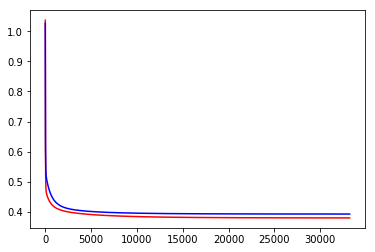

In [36]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
data = iris["data"]
target = iris["target"]
X_b = np.c_[data, np.ones((data.shape[0], 1))]

# ONLY USING THIS FOR LABEL MANIP! NOT ACTUAL MACHINE LEARNING!
lb = LabelBinarizer()
y = lb.fit_transform(target)

rands = np.random.permutation(X_b.shape[0])
test_size = int(len(data) * 0.1)
test_ixs = rands[:test_size]
train_ixs = rands[test_size:]
X_train, X_test = X_b[train_ixs], X_b[test_ixs]
y_train, y_test = y[train_ixs], y[test_ixs]

# Thetas are in columns
theta = np.random.random((X_train.shape[1], y_train.shape[1]))
print "Theta: ", theta

def sm_pred(X):
    proba = sm_proba(X)
    return np.argmax(proba, axis=1)

def sm_proba(X):
    score = theta.T.dot(X.T)
    total_scores = np.sum(score, axis=0).reshape(-1, 1)
    return (score.T / total_scores)

def sm_cost(X, y):
    # Basically log-loss
    proba = sm_proba(X)
    m = X.shape[0]
    if (proba < 0.0).any():
        negative = (proba < 0.0)
        proba[negative] = 1e-15
    y_times_log_p = y * np.log(proba)
    return (y_times_log_p.sum() / m)
    
def sm_grad_descent(X, y):
    proba = sm_proba(X)
    m = X.shape[0]
    pre_grads =(proba - y).T.dot(X)
    return pre_grads.T / m
    
eta = 0.5
previous_validation_score = 100000
validation_score = 99999

train_err = []
val_err = []

# Start BGD
while True:
    gradients = sm_grad_descent(X_train, y_train)
    theta = theta - eta * gradients
    train_err.append(-sm_cost(X_train, y_train))
    previous_validation_score = validation_score
    validation_score = -sm_cost(X_test, y_test)
    val_err.append(validation_score)
    if abs(validation_score - previous_validation_score) < 1e-8:
        break
print train_err[-1], val_err[-1]
plt.plot(np.arange(0, len(train_err)), train_err, 'r', np.arange(0, len(train_err)), val_err, 'b')
plt.show()

In [34]:
print sm_pred(X_test[:10]), np.argmax(y_test[:10], axis=1)

[0 0 2 2 1 1 2 0 2 1] [0 0 2 2 1 2 2 0 2 1]
